In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from unc_tools import Hyper, UncRegression
from copy import deepcopy
import os


SAVE_DIR = "/home/yaroslav/vzlet_vault/Практикум/Исследование кинетики ферментативной реакции/"
def savefig(name, path= "", fig=None, **kwargs):
    
    os.makedirs(SAVE_DIR, exist_ok=True)
    if fig is None:
        fig = plt.gcf()    
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, **kwargs)
    fig.savefig(os.path.join(".", path, name), **kwargs)
    #print(f"Saved: {path}")

[1.7739971797330843e-05+/-1.9836992203293198e-07,
 1.5146755478041803e-05+/-1.376333310078118e-06,
 1.608032421356568e-05+/-7.345008939157682e-07,
 1.9946009061879812e-05+/-1.1388803232843785e-06,
 2.142039480731908e-05+/-1.322005004709206e-06,
 2.204817067746404e-05+/-1.505570825190365e-06]

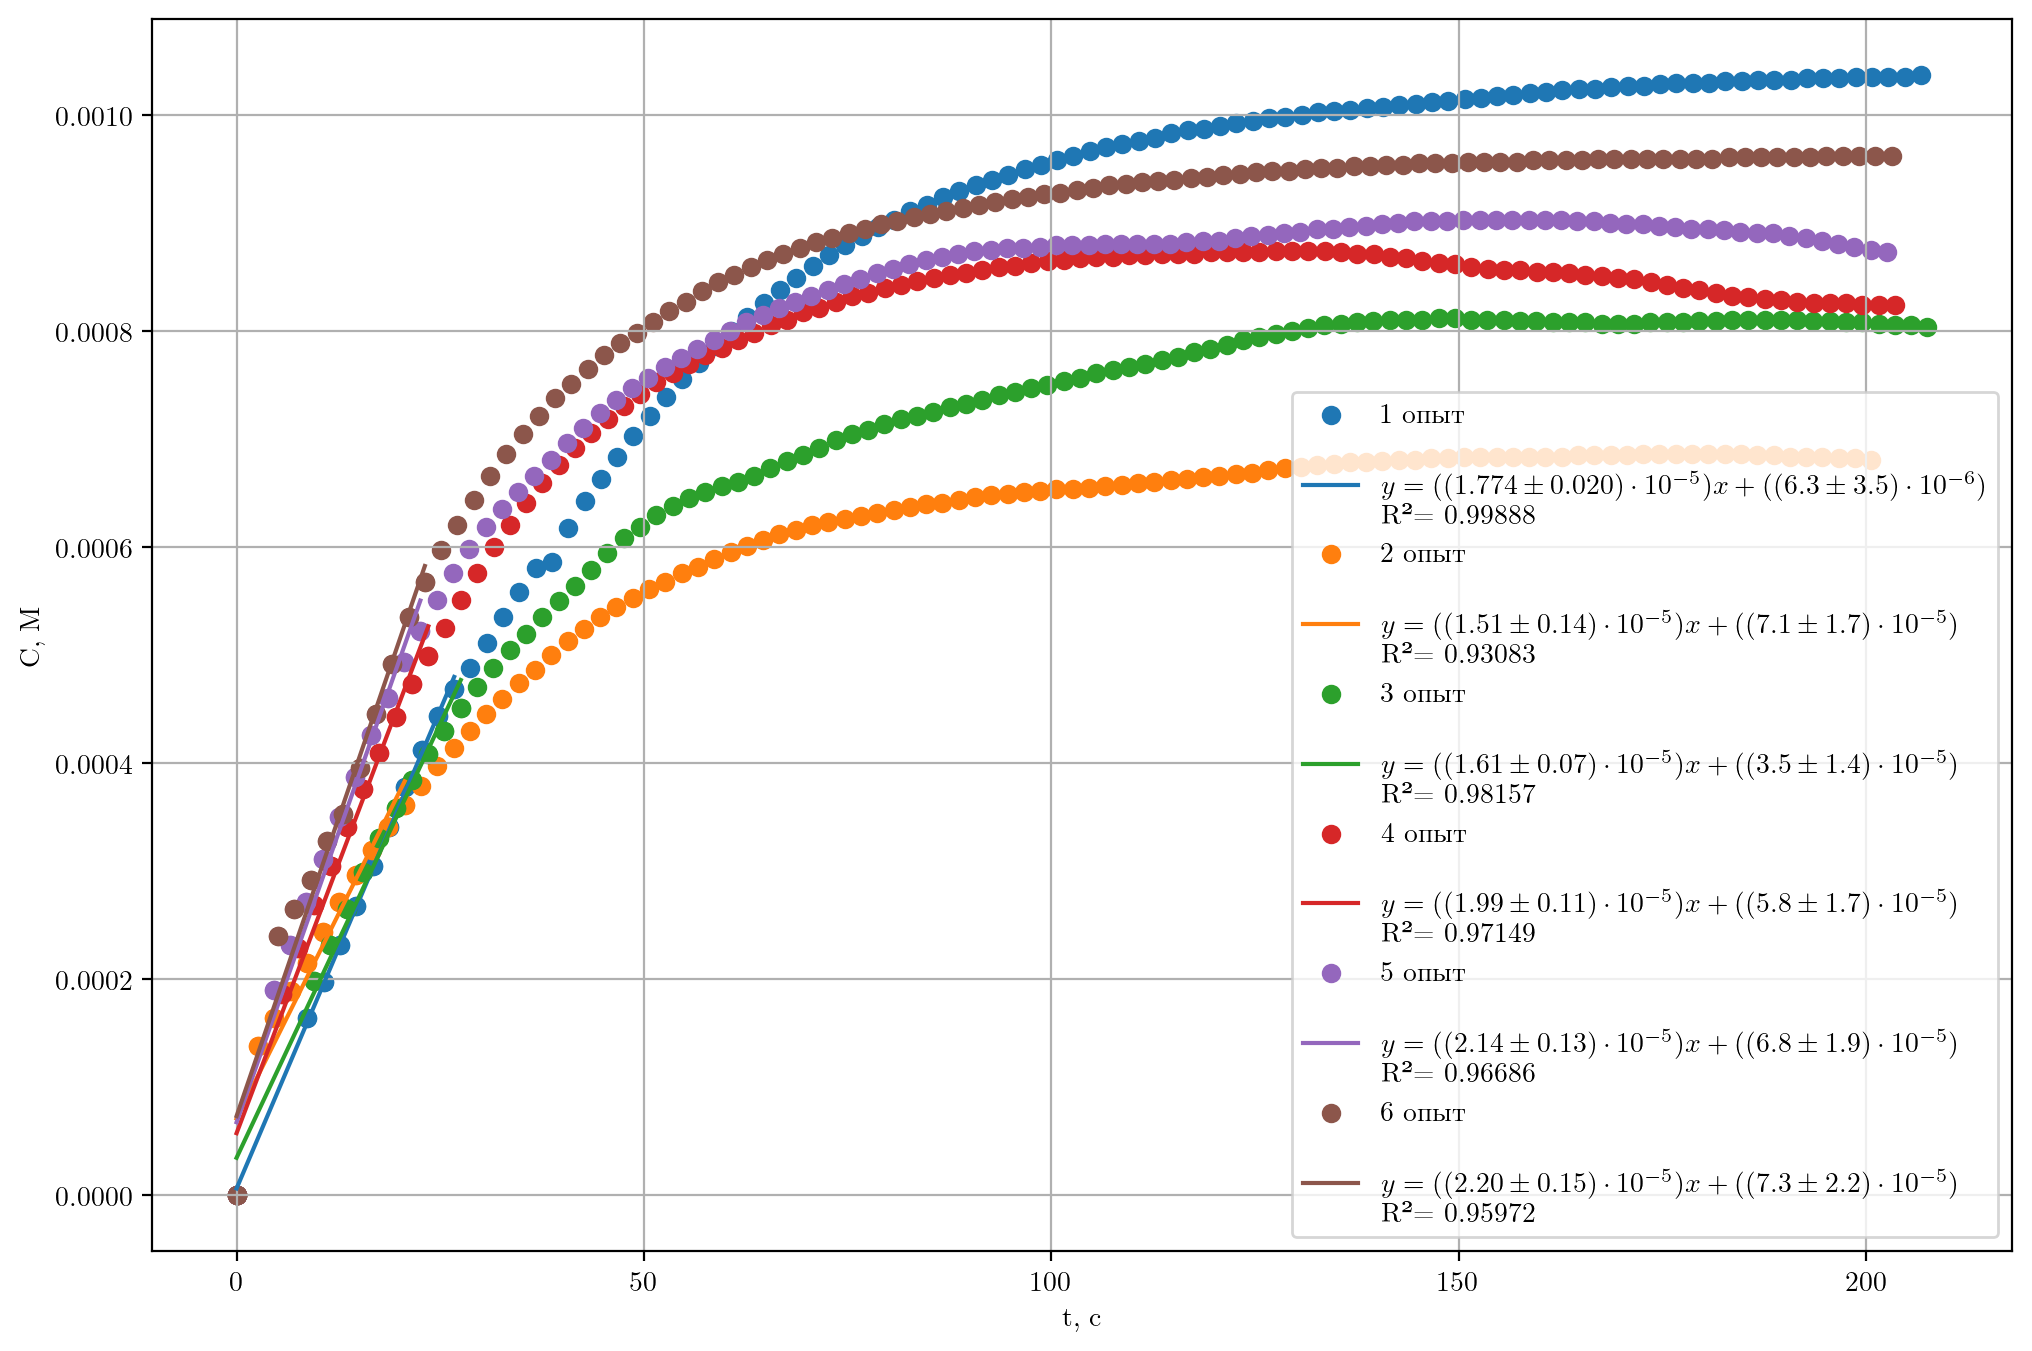

In [22]:


t0 = [8.7, 2.62, 9.51, 5.53, 4.55, 5.1]

fig, ax = plt.subplots(figsize=(12, 8), dpi=200)

r0 = []

for i in range(1, 7):
    df = pd.read_csv(f"{i}.csv")#.loc[1:]

    df["D"] = [float(x.replace(",", ".")) if type(x) == str else x for x in df["D"]]
    df["C"] = df.D / 725
    df.t += t0[i - 1]

    ax.scatter(df.t, df.C, label=f"{i} опыт")

    df = df.loc[0:10]
    reg1 = UncRegression(df.t, df.C)
    ax = reg1.plot(ax=ax)
    r0.append(reg1.coefs[0])

ax.set_xlabel("t, c")
ax.set_ylabel("C, M")
savefig("begin_phase_ferment", bbox_inches = "tight")

r0

In [23]:
tags = pd.DataFrame({"S0": [0.0015, 0.003, 0.0045, 0.0075, 0.015, 0.0225], "r0": r0})

tags.to_csv("velocities")

tags = tags.loc[1:]

UncRegression.latex_style(True)

Km_tot = []
rmax_tot = []


Km = 0.0021+/-0.0004; rmax = (2.44+/-0.16)e-05


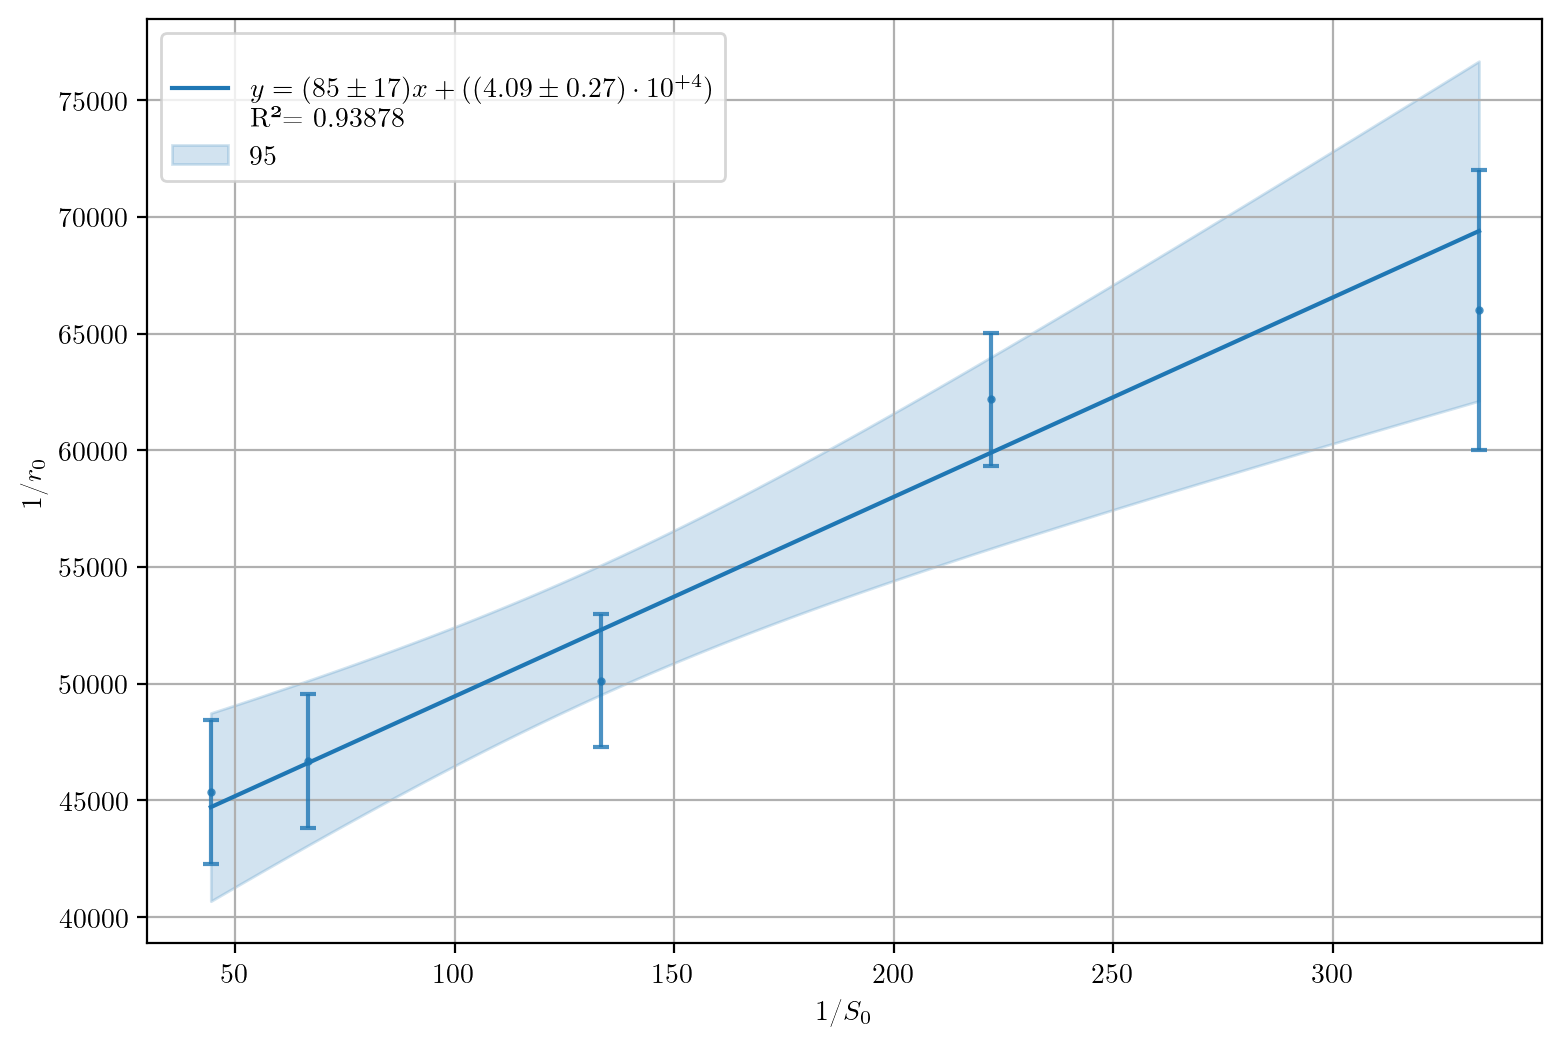

In [24]:
fig, ax = plt.subplots(figsize=(9,6), dpi = 200)
reg = UncRegression(1 / tags.S0, 1 / tags.r0)
#ax = reg.plot(ax=ax)
ax = reg.plot(ax=ax, show_band=True)
ax.set_xlabel("1/$S_0$")
ax.set_ylabel("1/$r_0$")
savefig("Lineweaver−Burk", bbox_inches="tight")
Km = reg.coefs[0] / reg.coefs[1]
rmax = 1 / reg.coefs[1]
Km_tot.append(Km)
rmax_tot.append(rmax)
print(f"Km = {Km}; rmax = {rmax}")

Km = 0.0021+/-0.0004; rmax = (2.44+/-0.16)e-05


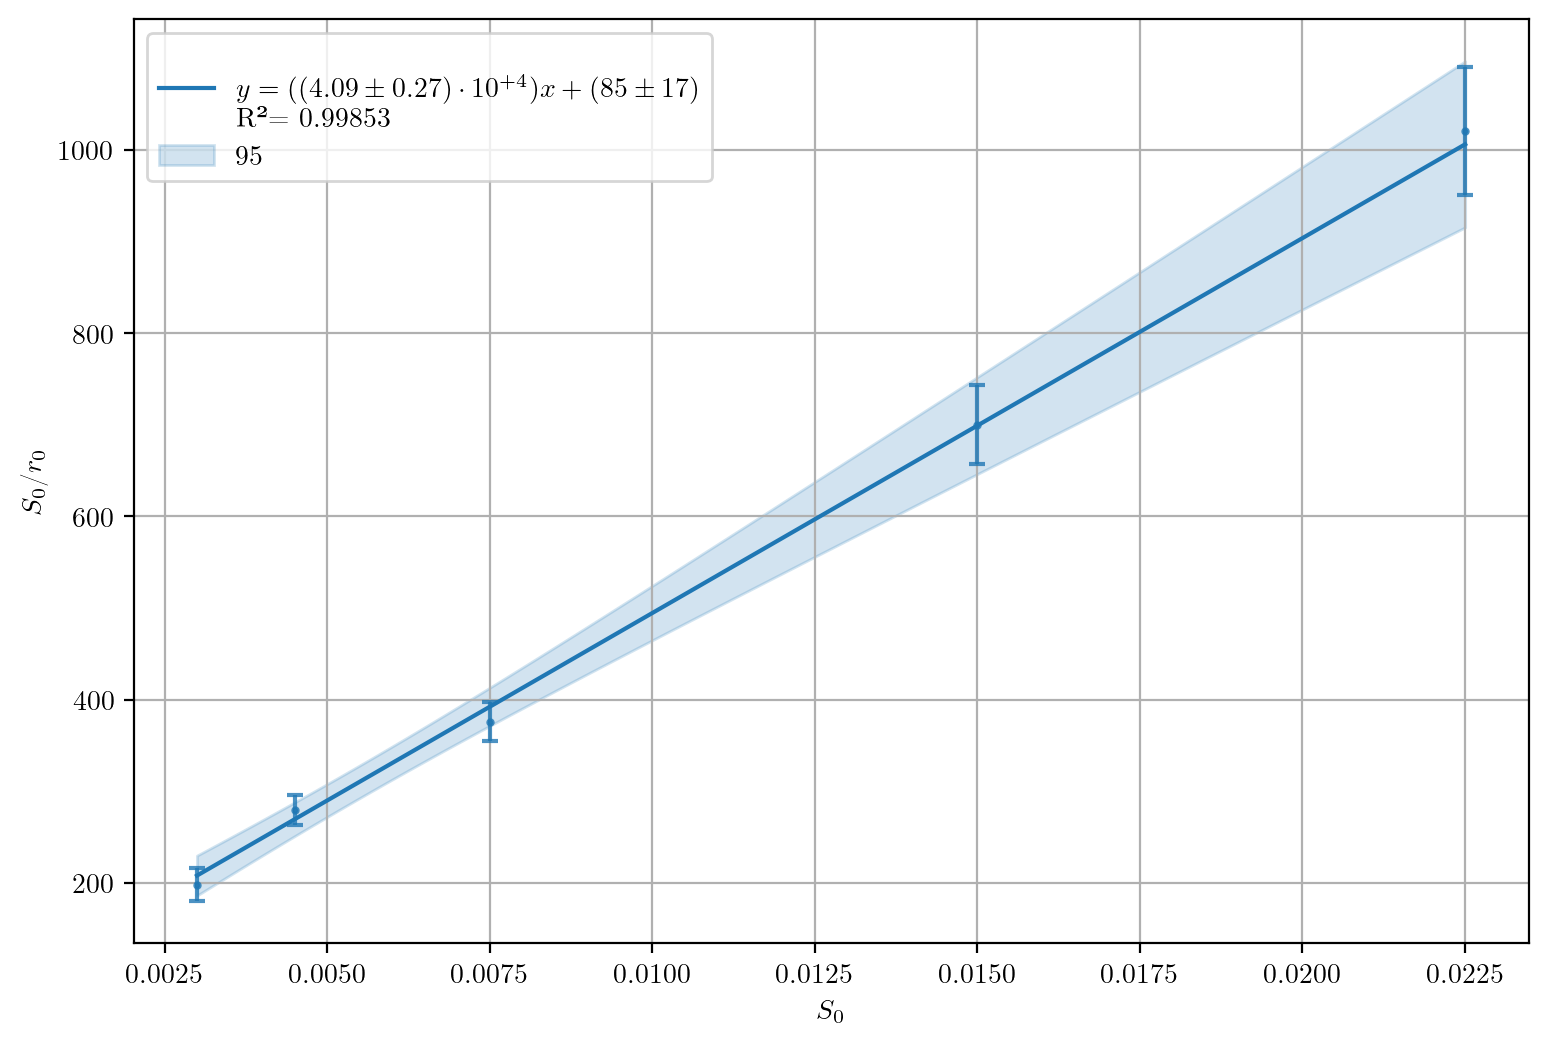

In [25]:
fig, ax = plt.subplots(figsize=(9,6), dpi = 200)
reg = UncRegression(tags.S0, tags.S0 / tags.r0)
#ax = reg.plot(ax=ax)
ax = reg.plot(ax=ax, show_band=True)
ax.set_xlabel("$S_0$")
ax.set_ylabel("$S_0$/$r_0$")
savefig("Woolf−Hanes", bbox_inches="tight")
Km = reg.coefs[1] / reg.coefs[0]
rmax = 1 / reg.coefs[0]
print(f"Km = {Km}; rmax = {rmax}")


Km = 0.0020+/-0.0004; rmax = (2.41+/-0.13)e-05


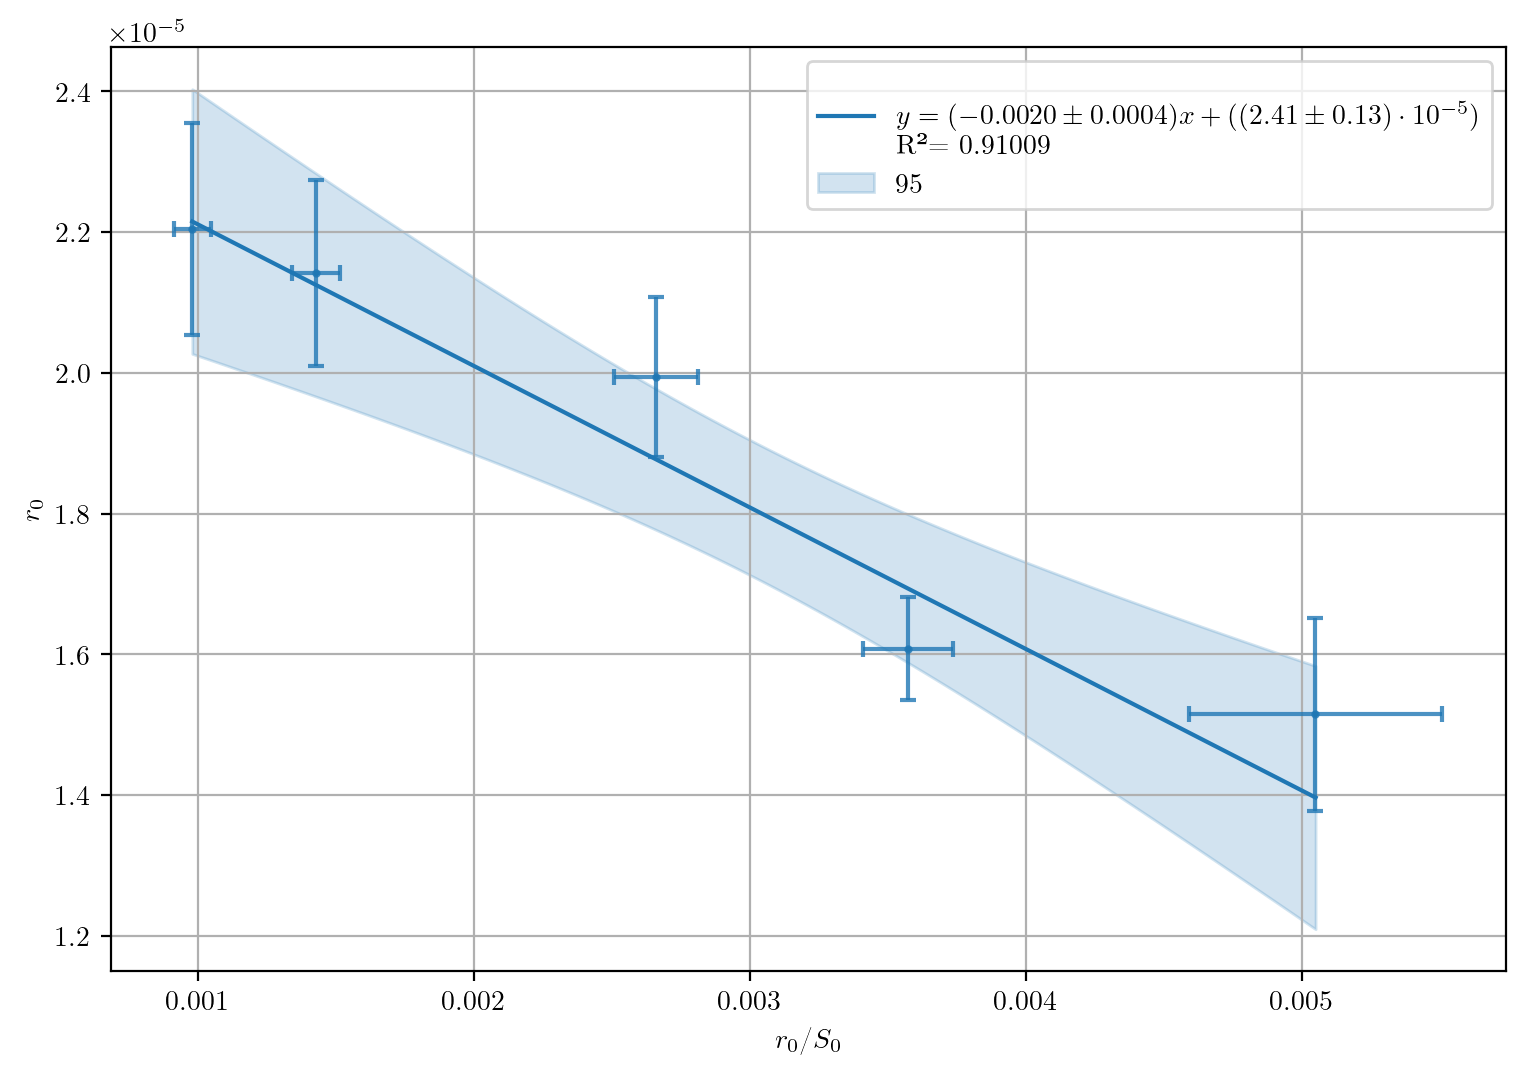

In [26]:
fig, ax = plt.subplots(figsize=(9,6), dpi = 200)
reg = UncRegression(tags.r0 / tags.S0, tags.r0)
#ax = reg.plot(ax=ax)
ax = reg.plot(ax=ax, show_band=True)
ax.set_xlabel("$r_0$/$S_0$")
ax.set_ylabel("$r_0$")
savefig("Eadie−Hofstee", bbox_inches="tight")
Km = -reg.coefs[0]
rmax = reg.coefs[1]
print(f"Km = {Km}; rmax = {rmax}")

Km = 0.0021+/-0.0005; rmax = (2.45+/-0.16)e-05


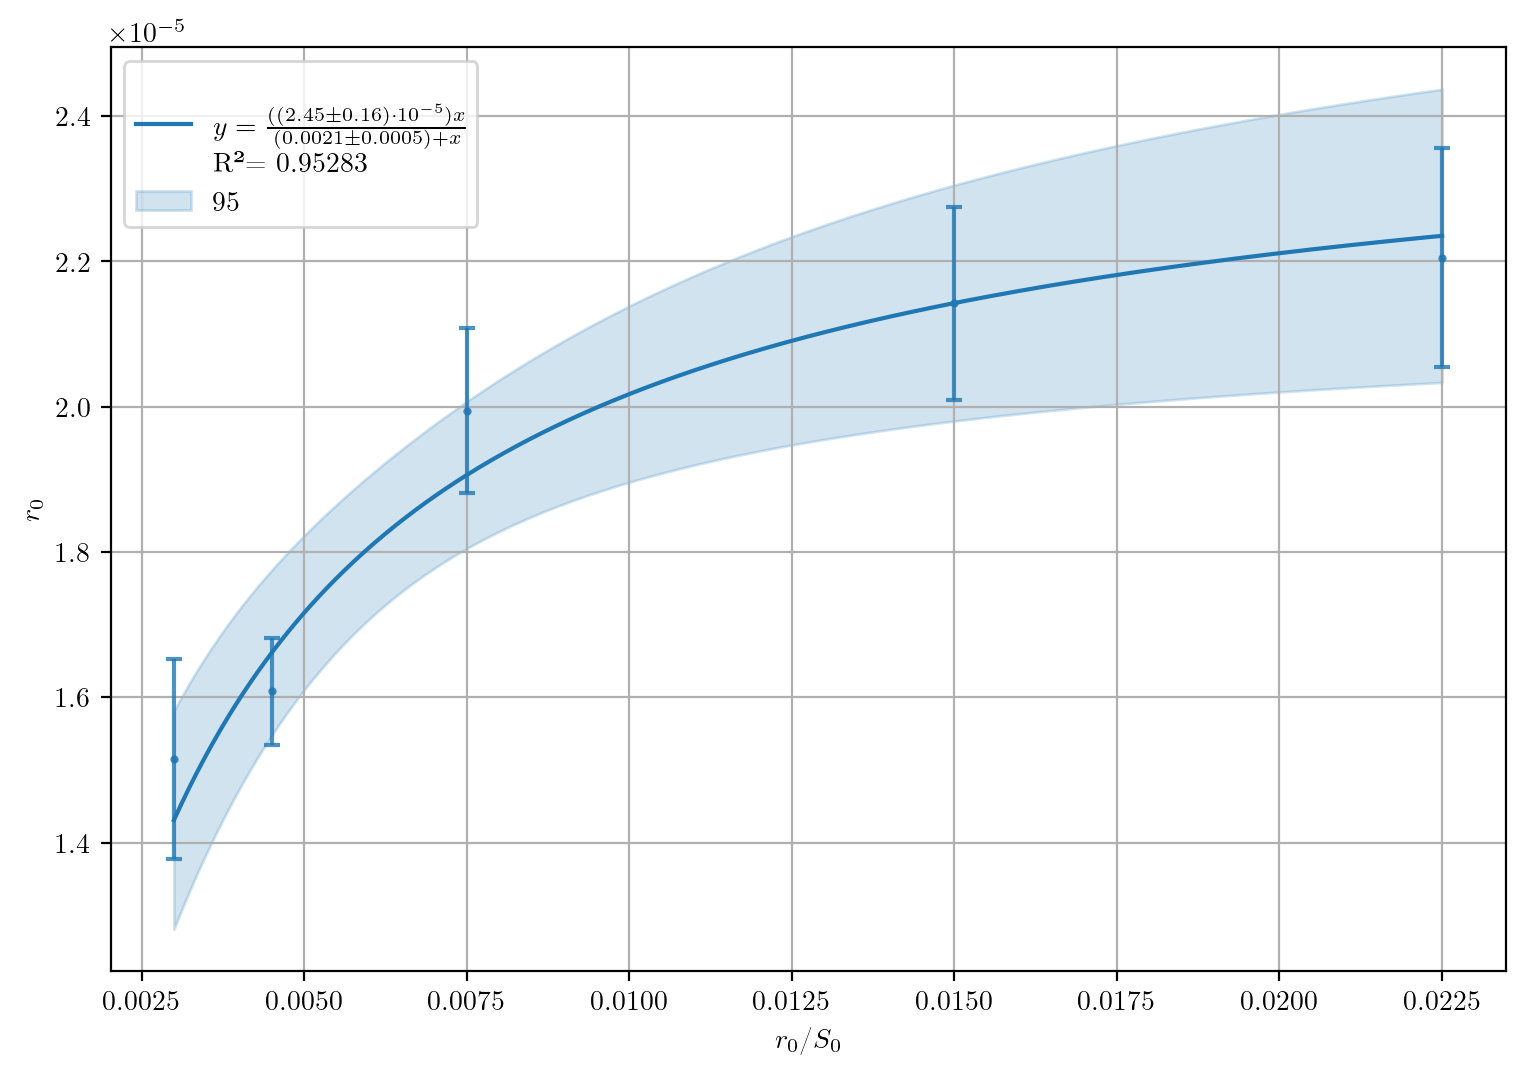

In [27]:
from unc_tools import FunctionBase1D

fig, ax = plt.subplots(figsize=(9,6), dpi = 200)
func = FunctionBase1D("a*x/(b+x)")

reg = UncRegression(tags.S0, tags.r0, func=Hyper())
#ax = reg.plot(ax=ax)
ax = reg.plot(ax=ax, show_band=True)
ax.set_xlabel("$r_0$/$S_0$")
ax.set_ylabel("$r_0$")
savefig("non-linear", bbox_inches="tight")
rmax = reg.coefs[0]
Km = reg.coefs[1]
print(f"Km = {Km}; rmax = {rmax}")

In [ ]:

print(np.sum(Km_tot), np.sum(rmax_tot))